In [1]:
%matplotlib inline

import os

import soundfile
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Audio
import scipy, pylab

import tensorflow


In [2]:
# settings
data = "/data/gijs/music/100 Best Classic Music/"
bins = 9 * 24  # I think there are about 9 octaves in the 50 - 22khz, range, we use 24 intervals per octave
samplerate = 22050
binsize = samplerate / bins # 2**10
samplelength = 60 # seconds

# stft properties
framesz = 0.050  # with a frame size of 50 milliseconds
hop = 0.025      # and hop size of 25 milliseconds.

In [3]:
# build of a list of files
filepaths = []
for dirpath, dirnames, filenames in os.walk(data):
    for filename in sorted(filenames):
        if filename[-3:] in ['ogg']:
            filepath = dirpath + filename
            filepaths.append(filepath)

In [4]:
# get the first file and downsclae
orig_samples, orig_samplerate = soundfile.read(filepaths[0])
assert orig_samplerate == 44100
# halve the sample rate, take left channel, one minute
samples = orig_samples[:orig_samplerate*samplelength:2, 0]

In [5]:
# spectagram and inverse

def stft(x, fs, framesz, hop):
    framesamp = int(framesz*fs)
    hopsamp = int(hop*fs)
    w = scipy.hanning(framesamp)
    X = scipy.array([scipy.fft(w*x[i:i+framesamp]) 
                     for i in range(0, len(x)-framesamp, hopsamp)])
    return X

def istft(X, fs, T, hop):
    x = scipy.zeros(T*fs)
    framesamp = X.shape[1]
    hopsamp = int(hop*fs)
    for n,i in enumerate(range(0, len(x)-framesamp, hopsamp)):
        x[i:i+framesamp] += scipy.real(scipy.ifft(X[n]))
    return x

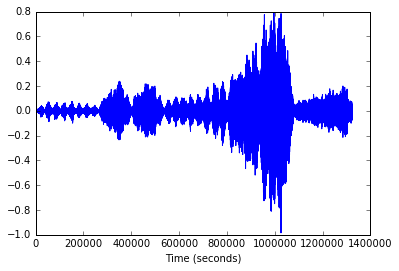

In [12]:
# listen to the file
Audio(samples, rate=samplerate)
pylab.figure()
pylab.plot(samples)
_ = pylab.xlabel('Time (seconds)')

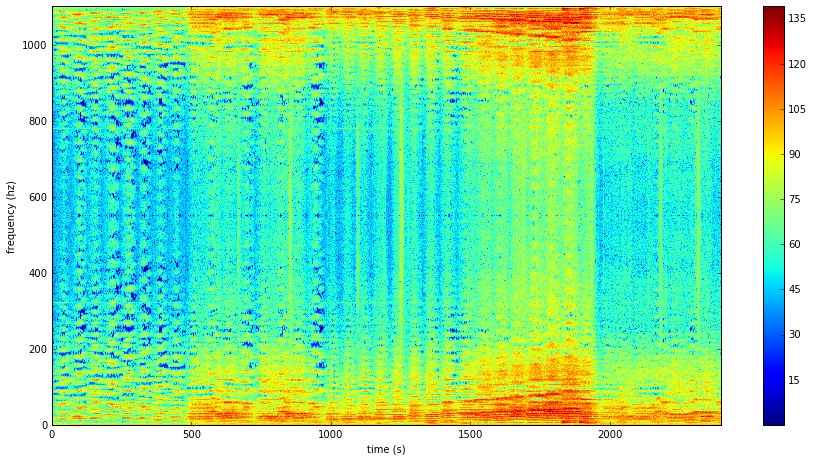

In [13]:
# compute and show spectagram
X = stft(samples, samplerate, framesz, hop)

plt.figure(figsize=(15, 7.5))
ims = 20. * np.log10(np.abs(X)/10e-6) # amplitude to decibel
timebins, freqbins = np.shape(ims)
plt.imshow(np.transpose(np.abs(ims)), origin="lower", aspect="auto", interpolation="none")
plt.colorbar()
plt.xlabel("time (s)")
plt.ylabel("frequency (hz)")
plt.xlim([0, timebins-1])
_ = plt.ylim([0, freqbins])

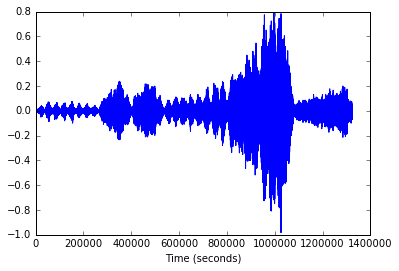

In [14]:
# Compute the ISTFT, show and listen
xhat = istft(X, samplerate, samplelength, hop)

pylab.figure()
pylab.plot(xhat)
pylab.xlabel('Time (seconds)')
Audio(xhat, rate=samplerate)